# High-level R tutorial

##### Full Version: https://cryptocurrencyresearch.org/

## Install Packages

In [1]:
install.packages("pacman")

Installing package into 'C:/Users/ries9/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'pacman' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ries9\AppData\Local\Temp\RtmpaKJnHc\downloaded_packages


In [2]:
library(pacman)

Warning message:
"package 'pacman' was built under R version 3.6.3"

Now we can use the `p_load()` function to install and load all other packages we will need: 

In [3]:
p_load("pins","dplyr","ggplot2","caret","xgboost","kernlab","tsibble","fabletools","fable","feasts","urca") # can vctrs be removed?

## Get the data

We can get the data using the `pins` package:

In [4]:
board_register(name = "pins_board", url = "https://raw.githubusercontent.com/predictcrypto/pins/master/", board = "datatxt")

In [5]:
cryptodata <- pin_get(name = "cryptodatadownload_ETH_Binance")

#### Preview data:

In [6]:
cryptodata

Date,Symbol,Open,High,Low,Close,VolumeUSDT,CloseLag1Hour,CloseLag12Hour,CloseLag24Hour,CloseLag3Day,CloseLag7Day,CloseLag14Day,CloseLag30Day,CloseLag90Day,CloseLag120Day,Volatility,Target24HourClose,DateTime
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2017-12-31,ETH,701.91,710.00,697.59,701.02,2101864.3,670.15,676.38,710.01,738.50,625.00,702.20,421.72,302.88,384.47,1.7789819,717.97,2017-12-31 01:00:00
2017-12-31,ETH,701.02,714.15,698.00,711.06,2051671.5,701.02,677.82,690.00,670.00,583.00,705.55,426.12,300.90,382.68,2.3137536,724.05,2017-12-31 02:00:00
2017-12-31,ETH,711.08,712.18,683.68,697.98,1900145.0,711.06,673.27,691.10,695.94,636.88,711.06,426.01,301.46,378.52,4.1686169,734.50,2017-12-31 03:00:00
2017-12-31,ETH,697.98,699.72,680.00,698.64,1995594.9,697.98,655.96,671.15,697.85,634.20,711.00,430.90,301.87,375.75,2.9000000,744.82,2017-12-31 04:00:00
2017-12-31,ETH,698.64,705.99,688.20,690.60,1631923.4,698.64,685.01,695.65,674.06,649.78,712.00,422.09,303.55,347.61,2.5850044,748.99,2017-12-31 05:00:00
2017-12-31,ETH,690.60,698.81,683.52,688.33,1911141.1,690.60,691.45,693.21,680.00,658.35,712.00,417.98,302.51,367.60,2.2369499,762.18,2017-12-31 06:00:00
2017-12-31,ETH,688.33,699.50,685.31,697.00,1300044.7,688.33,700.98,707.01,687.52,639.01,712.99,418.80,302.38,363.70,2.0705958,751.99,2017-12-31 07:00:00
2017-12-31,ETH,697.00,699.99,688.55,688.80,1678652.6,697.00,694.59,698.91,691.00,655.11,708.81,427.02,301.29,355.42,1.6614625,745.00,2017-12-31 08:00:00
2017-12-31,ETH,688.80,694.19,682.16,688.32,1310711.6,688.80,699.08,699.01,683.70,623.96,711.00,432.02,302.18,351.60,1.7635159,753.21,2017-12-31 09:00:00


## Clean Data 

In [7]:
cryptodata <- mutate(cryptodata, Volatility = ((High - Low)/Low)*100)

##### We can look at the new column `Volatility`

In [8]:
head(cryptodata$Volatility)

[1] 1.778982 2.313754 4.168617 2.900000 2.585004 2.236950

#### Remove Symbol column:

In [9]:
cryptodata <- select(cryptodata, -Symbol)

#### Train/Test Split 

In [10]:
cryptodata_train <- head(cryptodata, as.integer(nrow(cryptodata)*.8))

In [11]:
cryptodata_test <- tail(cryptodata, as.integer(nrow(cryptodata)*.2))

## Visualization

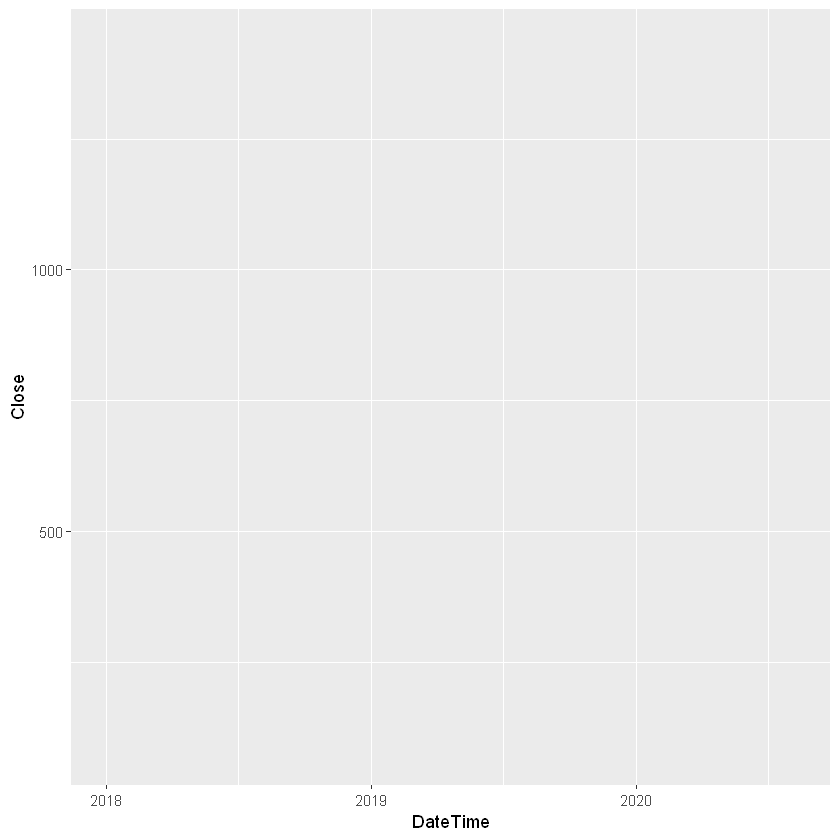

In [12]:
ggplot(data = cryptodata, aes(x = DateTime, y = Close))

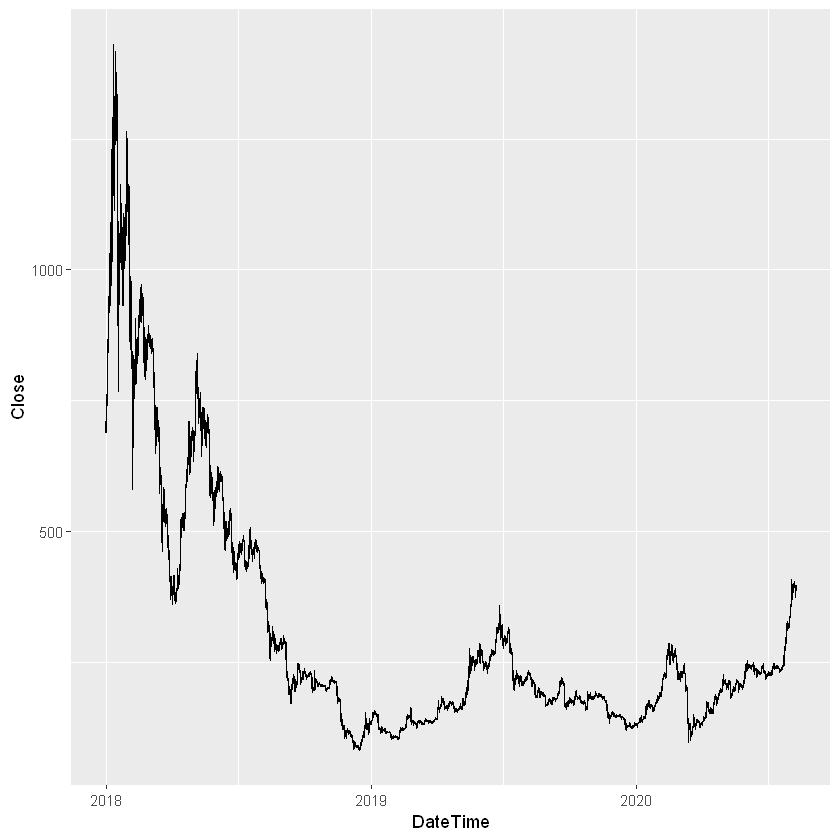

In [13]:
price_chart <- ggplot(data = cryptodata, aes(x = DateTime, y = Close)) +
  geom_line()
# Show chart
price_chart

## Predictive Models

##### Simple linear regression: 

In [14]:
lm(data = cryptodata_train, formula = "Target24HourClose ~ .")


Call:
lm(formula = "Target24HourClose ~ .", data = cryptodata_train)

Coefficients:
   (Intercept)            Date            Open            High             Low  
     1.500e+02       3.256e-01      -2.327e-01       1.114e-01      -2.185e-01  
         Close      VolumeUSDT   CloseLag1Hour  CloseLag12Hour  CloseLag24Hour  
     9.623e-01      -4.738e-07       4.653e-01      -1.942e-01       1.045e-01  
  CloseLag3Day    CloseLag7Day   CloseLag14Day   CloseLag30Day   CloseLag90Day  
     4.527e-03      -5.666e-02       5.084e-02      -1.812e-02       7.493e-03  
CloseLag120Day      Volatility        DateTime  
    -5.312e-03       1.781e+00      -3.863e-06  


##### Making a linear regression model using the `caret` package:

In [15]:
lm_fit <- train(Target24HourClose ~ .,
                    data = cryptodata_train,
                    method = "lm")

In [16]:
lm_fit

Linear Regression 

18277 samples
   17 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 18277, 18277, 18277, 18277, 18277, 18277, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  27.64146  0.9884458  13.64819

Tuning parameter 'intercept' was held constant at a value of TRUE

##### XGBoost model:

In [17]:
xgb_fit <- train(Target24HourClose ~ . ,
                    data = cryptodata_train,
                    method = "xgbLinear")

##### Additional options in `caret::train()`:

In [18]:
svm_fit <- train(Target24HourClose ~ . ,
                    data = cryptodata_train,
                    method = "svmPoly",
                    preProc = c("center", "scale"))

In [19]:
svm_fit

Support Vector Machines with Polynomial Kernel 

18277 samples
   17 predictor

Pre-processing: centered (17), scaled (17) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 18277, 18277, 18277, 18277, 18277, 18277, ... 
Resampling results across tuning parameters:

  degree  scale  C     RMSE      Rsquared   MAE     
  1       0.001  0.25  30.23830  0.9862796  16.71013
  1       0.001  0.50  29.59136  0.9868906  16.26107
  1       0.001  1.00  29.18465  0.9873017  15.85846
  1       0.010  0.25  28.87588  0.9875947  15.53962
  1       0.010  0.50  28.75614  0.9877097  15.42646
  1       0.010  1.00  28.67272  0.9877890  15.37675
  1       0.100  0.25  28.55538  0.9878901  15.29385
  1       0.100  0.50  28.49430  0.9879443  15.25026
  1       0.100  1.00  28.43458  0.9879926  15.18930
  2       0.001  0.25  29.52164  0.9869348  16.11468
  2       0.001  0.50  28.89655  0.9875390  15.62072
  2       0.001  1.00  28.37441  0.9880401  15.24417
  2       0.010  0.25  26.34587  

#### Time-Aware Cross Validation

In [20]:
train_control <- trainControl(method = "timeslice",
                              initialWindow = 31,
                              horizon = 1,
                              fixedWindow = TRUE,
                              number = 5)
                              #,search = 'grid')

##### Linear Model with cross validation:

In [21]:
lm_fit <- train(Target24HourClose ~ . ,
                    data = cryptodata_train,
                    method = "lm",
                    trControl = train_control)

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdat

In [22]:
lm_fit

Linear Regression 

18277 samples
   17 predictor

No pre-processing
Resampling: Rolling Forecasting Origin Resampling (1 held-out with a fixed window) 
Summary of sample sizes: 31, 31, 31, 31, 31, 31, ... 
Resampling results:

  RMSE      Rsquared  MAE     
  6.802424  NaN       6.802424

Tuning parameter 'intercept' was held constant at a value of TRUE

##### Using XGBoost with cross validation: (Commented out because takes a long time)

In [23]:
#xgb_fit <- train(Target24HourClose ~ . ,
#                    data = cryptodata_train,
#                    method = "xgbLinear",
#                    trControl = train_control)

In [24]:
#xgb_fit

### Make Predictions

In [25]:
xgb_pred <- predict(xgb_fit, newdata = cryptodata_test)

In [26]:
head(xgb_pred)

[1] 181.2407 181.3874 181.5734 184.0796 185.2436 186.1443

### Evaluate Performance

In [27]:
postResample(pred = xgb_pred, obs = cryptodata_test$Close)

RMSE   Rsquared        MAE 
24.6849837  0.9051738 15.4659078

## Timeseries Data Prep

#### Make a tsibble

In [28]:
cryptodata_ts <- as_tsibble(cryptodata, index = DateTime)

In [29]:
cryptodata_ts

Date,Open,High,Low,Close,VolumeUSDT,CloseLag1Hour,CloseLag12Hour,CloseLag24Hour,CloseLag3Day,CloseLag7Day,CloseLag14Day,CloseLag30Day,CloseLag90Day,CloseLag120Day,Volatility,Target24HourClose,DateTime
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2017-12-31,701.91,710.00,697.59,701.02,2101864.3,670.15,676.38,710.01,738.50,625.00,702.20,421.72,302.88,384.47,1.7789819,717.97,2017-12-31 01:00:00
2017-12-31,701.02,714.15,698.00,711.06,2051671.5,701.02,677.82,690.00,670.00,583.00,705.55,426.12,300.90,382.68,2.3137536,724.05,2017-12-31 02:00:00
2017-12-31,711.08,712.18,683.68,697.98,1900145.0,711.06,673.27,691.10,695.94,636.88,711.06,426.01,301.46,378.52,4.1686169,734.50,2017-12-31 03:00:00
2017-12-31,697.98,699.72,680.00,698.64,1995594.9,697.98,655.96,671.15,697.85,634.20,711.00,430.90,301.87,375.75,2.9000000,744.82,2017-12-31 04:00:00
2017-12-31,698.64,705.99,688.20,690.60,1631923.4,698.64,685.01,695.65,674.06,649.78,712.00,422.09,303.55,347.61,2.5850044,748.99,2017-12-31 05:00:00
2017-12-31,690.60,698.81,683.52,688.33,1911141.1,690.60,691.45,693.21,680.00,658.35,712.00,417.98,302.51,367.60,2.2369499,762.18,2017-12-31 06:00:00
2017-12-31,688.33,699.50,685.31,697.00,1300044.7,688.33,700.98,707.01,687.52,639.01,712.99,418.80,302.38,363.70,2.0705958,751.99,2017-12-31 07:00:00
2017-12-31,697.00,699.99,688.55,688.80,1678652.6,697.00,694.59,698.91,691.00,655.11,708.81,427.02,301.29,355.42,1.6614625,745.00,2017-12-31 08:00:00
2017-12-31,688.80,694.19,682.16,688.32,1310711.6,688.80,699.08,699.01,683.70,623.96,711.00,432.02,302.18,351.60,1.7635159,753.21,2017-12-31 09:00:00


##### Are there any gaps?

In [30]:
has_gaps(cryptodata_ts)

.gaps
<lgl>
TRUE


##### Find gaps

In [31]:
scan_gaps(cryptodata_ts)

DateTime
<dttm>
2019-11-07 03:00:00


#### Fill data gaps

In [32]:
cryptodata_ts <- fill_gaps(cryptodata_ts)

### Train/Test Split

In [33]:
ts_train <- head(cryptodata_ts, as.integer(nrow(cryptodata)*.8))

In [34]:
ts_test <- tail(cryptodata_ts, as.integer(nrow(cryptodata)*.2))

## Timeseries Predictive Modeling

#### Simple naive model

In [35]:
naive_model <- model(ts_train, naive = NAIVE(Close))

In [36]:
naive_model

naive
<model>
<NAIVE>


#### Compare predictions to what actually happens with this approach:

In [37]:
augment(naive_model)

.model,DateTime,Close,.fitted,.resid
<chr>,<dttm>,<dbl>,<dbl>,<dbl>
naive,2017-12-31 01:00:00,701.02,NA,NA
naive,2017-12-31 02:00:00,711.06,701.02,10.04
naive,2017-12-31 03:00:00,697.98,711.06,-13.08
naive,2017-12-31 04:00:00,698.64,697.98,0.66
naive,2017-12-31 05:00:00,690.60,698.64,-8.04
naive,2017-12-31 06:00:00,688.33,690.60,-2.27
naive,2017-12-31 07:00:00,697.00,688.33,8.67
naive,2017-12-31 08:00:00,688.80,697.00,-8.20
naive,2017-12-31 09:00:00,688.32,688.80,-0.48


### Make multiple models at the same time

In [38]:
ts_models <- model(ts_train, snaive = SNAIVE(Close ~ lag("week")),
                             arima = ARIMA(Close))

In [39]:
ts_models

snaive,arima
<model>,<model>
<SNAIVE>,"<ARIMA(3,1,0)(2,0,0)[24]>"


##### We can look at the terms chosen for the ARIMA model:

In [40]:
tidy(ts_models)

.model,term,estimate,std.error,statistic,p.value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
arima,ar1,-0.39146184,0.007356441,-53.213481,0.000000e+00
arima,ar2,-0.21469056,0.007740312,-27.736680,6.783179e-166
arima,ar3,-0.11251466,0.007362197,-15.282755,2.101530e-52
arima,sar1,-0.06460746,0.007409118,-8.719994,3.016729e-18
arima,sar2,-0.01816475,0.007430600,-2.444588,1.451116e-02


### Forecast

In [41]:
ts_forecasts <- forecast(ts_models, h = '1 day')

In [42]:
ts_forecasts

.model,DateTime,Close,.mean
<chr>,<dttm>,<dist>,<dbl>
snaive,2020-01-31 14:00:00,"N(162, 5298)",162.0400
snaive,2020-01-31 15:00:00,"N(163, 5298)",162.6200
snaive,2020-01-31 16:00:00,"N(161, 5298)",160.9200
snaive,2020-01-31 17:00:00,"N(161, 5298)",161.1800
snaive,2020-01-31 18:00:00,"N(162, 5298)",161.7700
snaive,2020-01-31 19:00:00,"N(164, 5298)",163.7100
snaive,2020-01-31 20:00:00,"N(163, 5298)",163.3500
snaive,2020-01-31 21:00:00,"N(163, 5298)",163.2700
snaive,2020-01-31 22:00:00,"N(163, 5298)",163.0700


### Accuracy on test set (all timeseries models)

In [43]:
accuracy(ts_forecasts, ts_test)

Warning message:
"The future dataset is incomplete, incomplete out-of-sample data will be treated as missing. 
2 observations are missing between 2020-01-31 14:00:00 and 2020-01-31 15:00:00"

.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
arima,Test,1.396954,2.217031,1.921215,0.7627727,1.056645,NaN,0.4464287
snaive,Test,20.439545,20.640208,20.439545,11.2730532,11.273053,NaN,0.6768072


In [44]:
remotes::update_packages("rlang")